# Ecommerce - Linear Regression 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

## Getting the Data


In [2]:
customers = pd.read_csv('Ecommerce.csv')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [5]:
customers.shape

(500, 8)

### Checking missing values & Duplicates

In [6]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
customers.duplicated().sum()

0

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Statistical Summary

In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

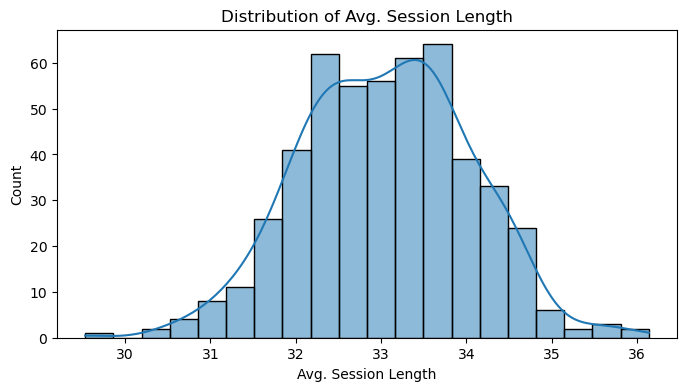

In [10]:
#Distribution of columns

plt.figure(figsize=(8,4))
sns.histplot(customers['Avg. Session Length'],kde= True)
plt.title('Distribution of Avg. Session Length')
plt.show()

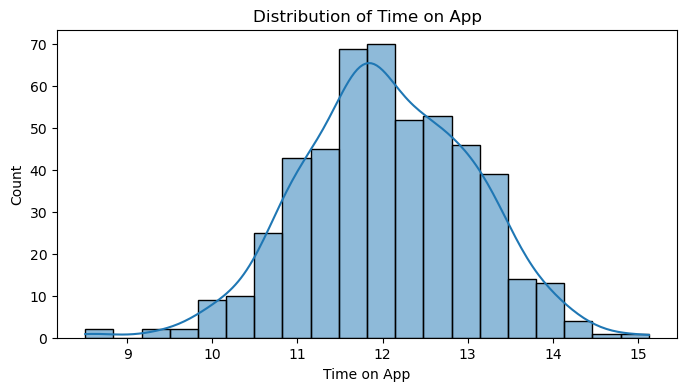

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Time on App'],kde= True)
plt.title('Distribution of Time on App')
plt.show()

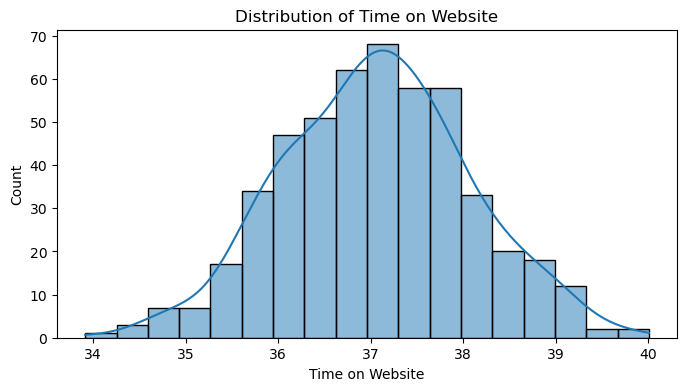

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Time on Website'],kde= True)
plt.title('Distribution of Time on Website')
plt.show()

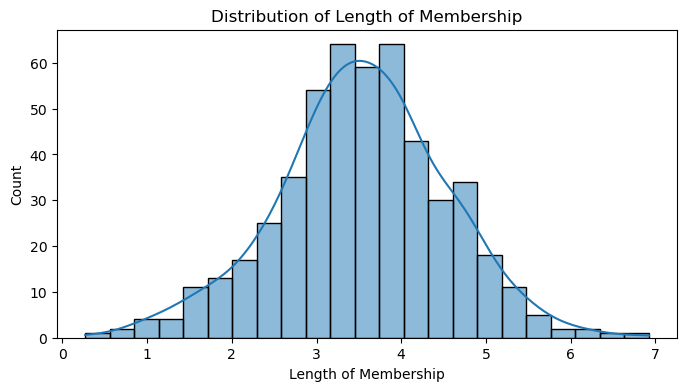

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Length of Membership'],kde= True)
plt.title('Distribution of Length of Membership')
plt.show()

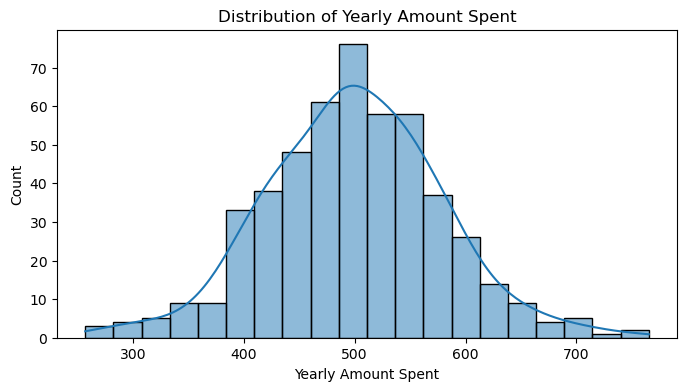

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(customers['Yearly Amount Spent'],kde= True)
plt.title('Distribution of Yearly Amount Spent')
plt.show()

### How are the client's time spent on each platform related to the amount that they spend per year?

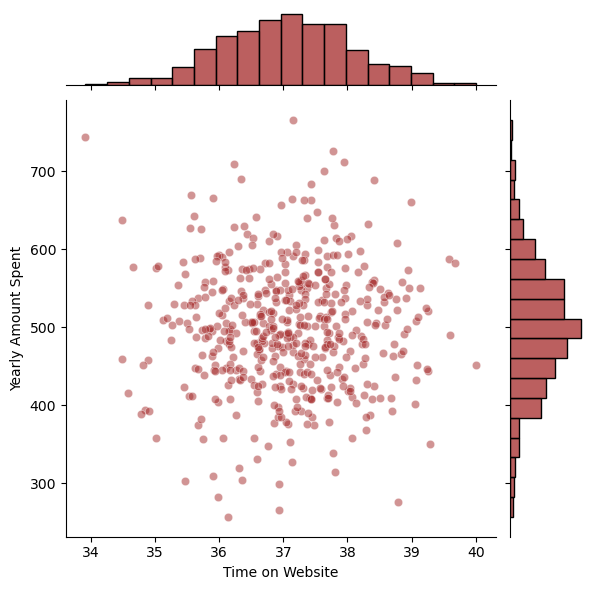

In [15]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5,color = 'brown')

* There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year.

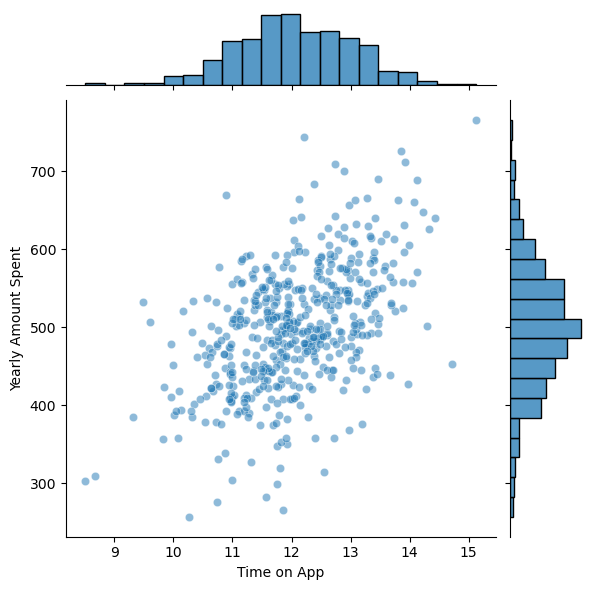

In [16]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

* This graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

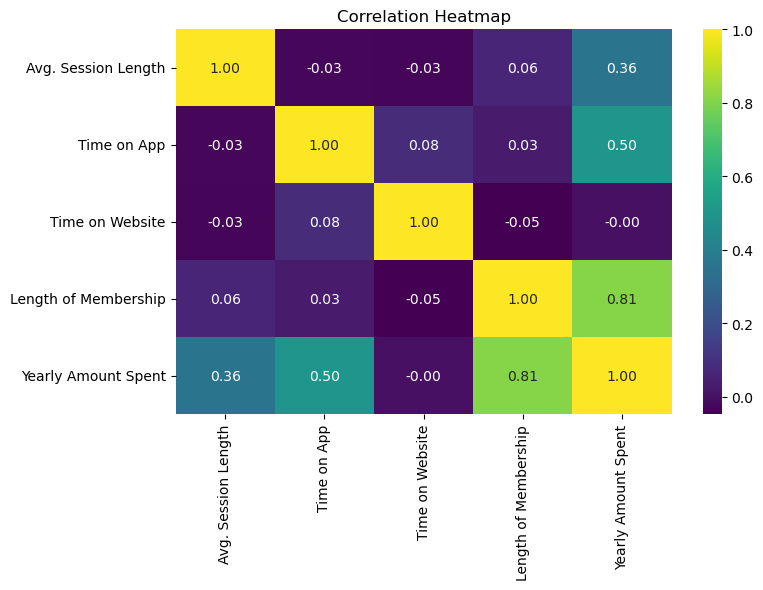

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = customers.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

* 1. There is strong linear positive correlation between Yearly Amount Spent and Length of Membership
* 2. There is weak linear positive correlation between Yearly Amount Spent and Avg Session Length
* 3. There is no correlation between Yearly Amount Spent and Time on Website

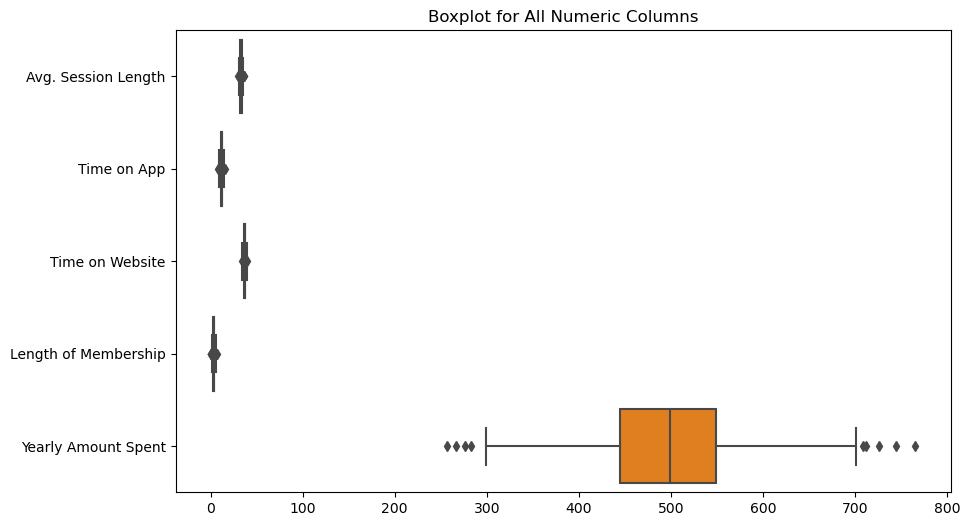

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, orient="h", palette="Set1")

plt.title('Boxplot for All Numeric Columns')
plt.show()

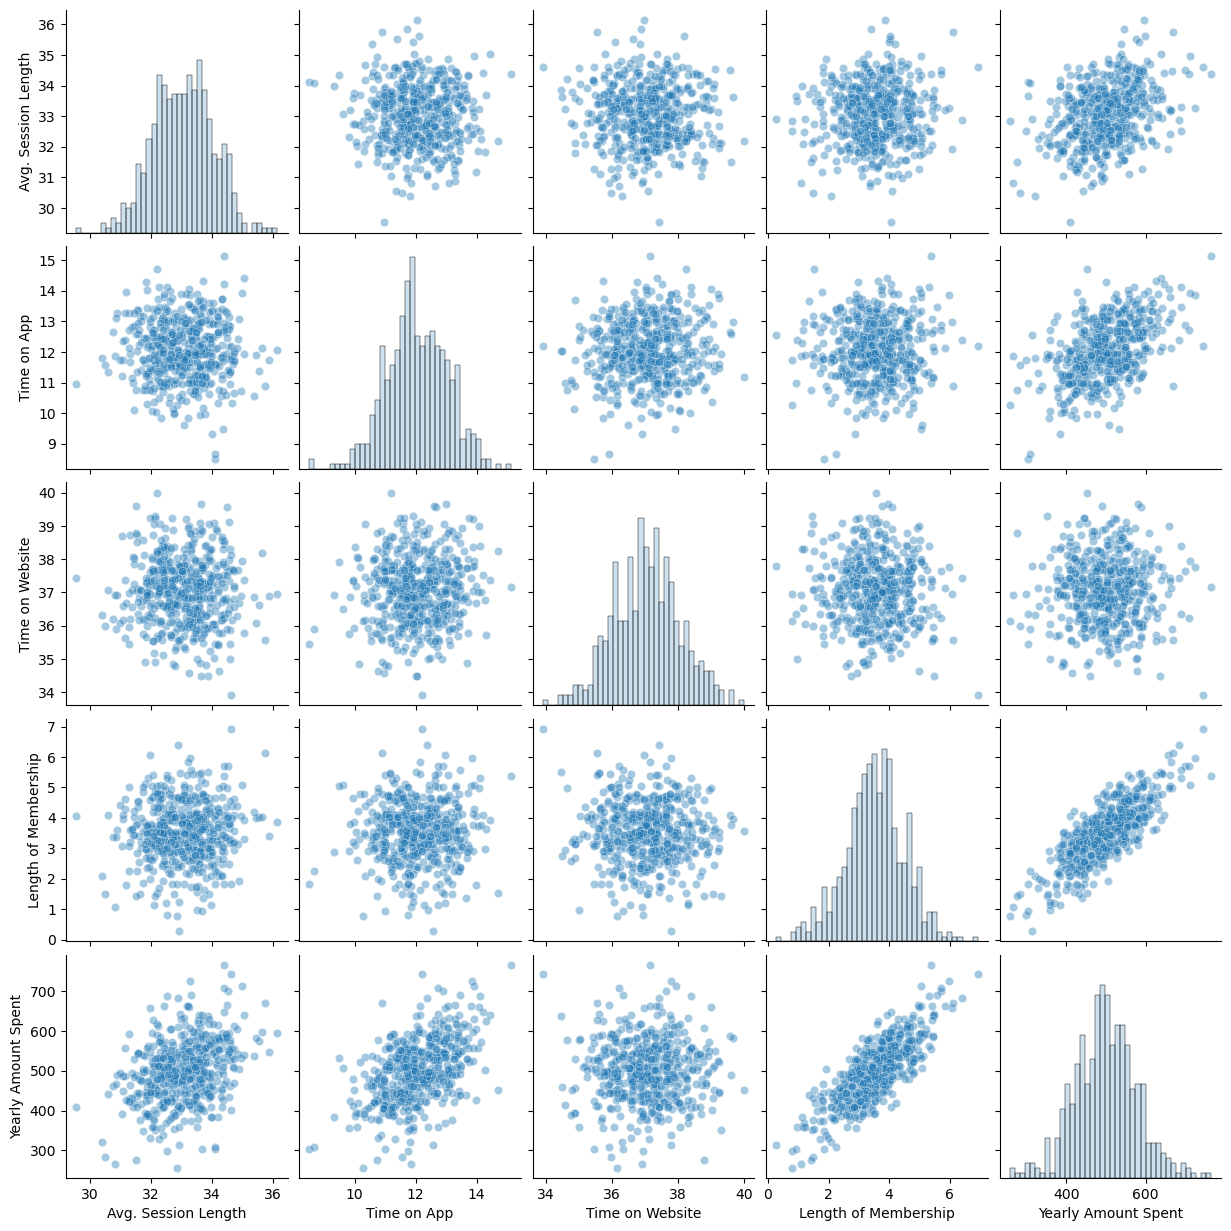

In [19]:
import seaborn as sns

# Custom palette
sns.pairplot(customers, 
             kind='scatter', 
             plot_kws={'alpha': 0.4}, 
             diag_kws={'alpha': 0.22, 'bins': 40})

* After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

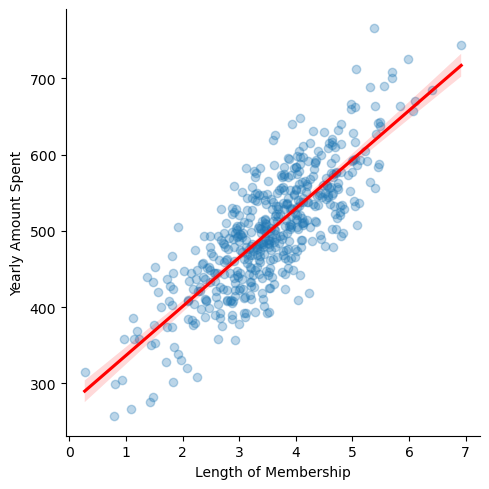

In [20]:
# length of membership vs yearly amount spent
sns.lmplot(
    x='Length of Membership', 
    y='Yearly Amount Spent', 
    data=customers,
    scatter_kws={'alpha': 0.3},  # Change 'blue' to your desired color for scatter
    line_kws={'color': 'red'}  # Change 'red' to your desired color for the regression line
)

plt.show()


## Splitting the data

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [23]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [24]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [25]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [27]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [28]:
y_train

5      637.102448
116    479.231093
45     549.860590
16     457.847696
462    397.420584
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 350, dtype: float64

## Training the Model with multivariable regression

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (yearly expenditure). As the plots suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
# the coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [33]:
# r squared
lm.score(X, y)

0.9842821675307221

In [34]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Training the model with multivariable regression using OLS

Allows us to get more details about the model

In [35]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())


                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Sat, 31 Aug 2024   Prob (F-statistic):          3.46e-315
Time:                         17:52:24   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

## Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [36]:
predictions = lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [37]:
# Comparing the model predicted values with the  original value to see how well the model performed.
print (lm.score(X_train, y_train))
print (lm.score(X_test, y_test))


0.9854085989105928
0.9808757641125855


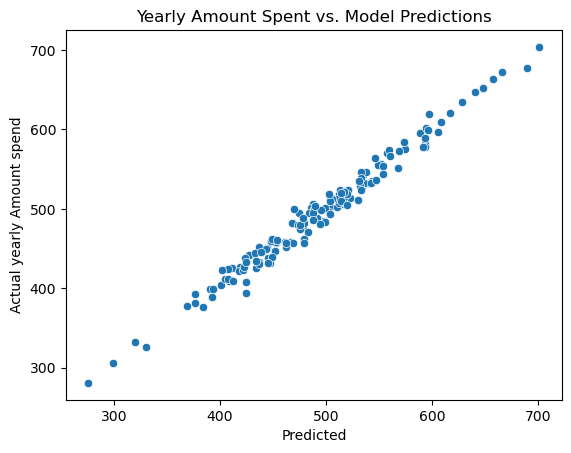

In [38]:
# Scatter plot of actual values of y vs predicted values.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and predictions are defined
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Predicted')
plt.ylabel('Actual yearly Amount spend')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()  # To display the plot


## Evaluation of the model

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [40]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432128
Mean Squared Error: 103.91554136503363
Root Mean Squared Error: 10.193897260863169


## Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.

In [41]:
residuals = y_test-predictions

In [42]:
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

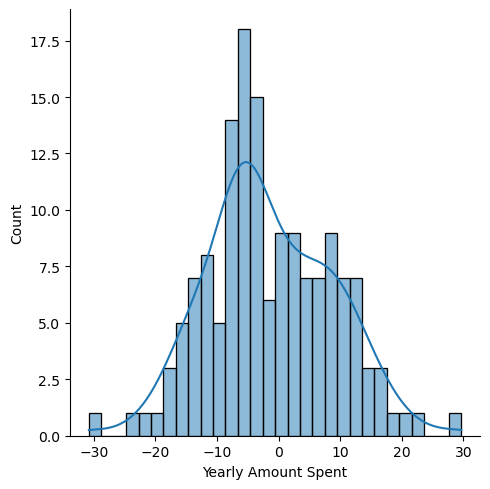

In [43]:
sns.displot(residuals,bins=30,kde=True)

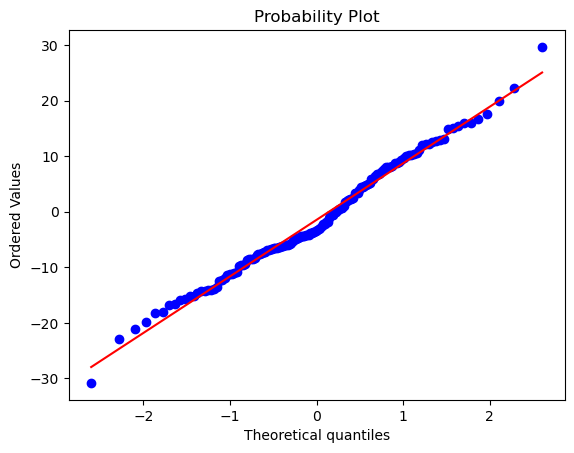

In [44]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion

* The inferences that could drawn from this regression analysis are-
1. The factors that influence customers yearly spend on the ecommerce site are Avg Session Length, Time on APP & Length of Membership.
2. According to the model,Lenghth of Membership has strongest influence on the customers spend.The company should continue to deploy strategies that strengthns customer loyality and retention.
3. The purpose of this analysis was to answer whether the business should double-down on either App or Website.
4. This analysis shows very clearly that it is App that the business should focus on (not the website).